# Proyecto 1 – Atención de Incidentes  
## Tarea 2 – Exploración de Datos (EDA)

Estadísticas descriptivas y visualizaciones (histogramas, diagramas de caja, diagramas de dispersión, diagramas de violín y otros que permiten comprender cómo se comportan las variables).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("incident_event_log.csv")
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


Se puede observar que la base de datos corresponde a un log transaccional de gestión de incidentes con 36 variables y múltiples registros por caso. El dataset tiene la estructura típica de un registro de eventos, apto para analizar estados, carga operativa, calidad percibida y eficiencia a lo largo del tiempo.

In [3]:
print("Información general del DataFrame:")
print(df.info())

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-nul

La salida de df.info() confirma que el dataset tiene 141.712 registros y 36 columnas, todas completas. Predominan variables de tipo object y se observan tres columnas numéricas enteras. También aparecen variables booleanas para estado operativo. Las columnas de tiempo (opened_at, sys_created_at, sys_updated_at, resolved_at, closed_at) aún figuran como object, por lo que conviene parsearlas a datetime antes de cualquier análisis temporal. En conclusión, se aprecia un log amplio y completo, con contadores listos para describir su distribución y un conjunto grande de categóricas.

In [4]:
date_cols = ["opened_at","sys_created_at","sys_updated_at","resolved_at","closed_at"]
for c in date_cols:
    df[c] = pd.to_datetime(df[c], errors="coerce", utc=True).dt.tz_localize(None)
print("Columnas convertidas a datetime:", date_cols)

C:\Users\FABIOLA PINTO Q\AppData\Local\Temp\ipykernel_5860\3654708701.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[c] = pd.to_datetime(df[c], errors="coerce", utc=True).dt.tz_localize(None)
C:\Users\FABIOLA PINTO Q\AppData\Local\Temp\ipykernel_5860\3654708701.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[c] = pd.to_datetime(df[c], errors="coerce", utc=True).dt.tz_localize(None)
C:\Users\FABIOLA PINTO Q\AppData\Local\Temp\ipykernel_5860\3654708701.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[c] = pd.to_datetime(df[c], errors="coerce", utc=True).dt.tz_localize(None)


Columnas convertidas a datetime: ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']


C:\Users\FABIOLA PINTO Q\AppData\Local\Temp\ipykernel_5860\3654708701.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[c] = pd.to_datetime(df[c], errors="coerce", utc=True).dt.tz_localize(None)


Esta celda deja en orden las cinco columnas de tiempo (opened_at, sys_created_at, sys_updated_at, resolved_at y closed_at) y se confirma que ya están en formato datetime. Eso nos dice que el dataset trae el recorrido completo de cada incidente: cuándo se abrió, cuándo lo creo y lo actualizó el sistema, cuándo se resolvió y cuándo se cerró.

In [5]:
print("\nConteo de tipos de columnas:")
print(df.dtypes.value_counts())

num_dups = df.duplicated().sum()
print(f"\nFilas duplicadas: {num_dups}")


Conteo de tipos de columnas:
object            24
datetime64[ns]     5
bool               4
int64              3
Name: count, dtype: int64

Filas duplicadas: 0


Se observa que la tabla tiene 36 columnas: 24 de texto/categoría, 5 de fecha-hora, 4 booleanas y 3 numéricas enteras (contadores). Además, el chequeo de duplicados arroja 0, es decir, no hay filas idénticas en todas las columnas.

In [6]:
display(df.describe(include="number").T)

,count,mean,std,min,25%,50%,75%,max
reassignment_count,141712.0,1.104197,1.734673,0.0,0.0,1.0,1.0,27.0
reopen_count,141712.0,0.021918,0.207302,0.0,0.0,0.0,0.0,8.0
sys_mod_count,141712.0,5.080946,7.680652,0.0,1.0,3.0,6.0,129.0


En las variables numéricas se observa lo siguiente:

reassignment_count tiene mediana 1 (P25=0, P75=1), por lo que la mayoría de incidentes tienen entre 0 y 1 reasignación; existen pocos casos extremos hasta 27.

reopen_count es casi siempre 0 (media =0,02; P25=P50=P75=0; máximo 8), lo que indica que las reaperturas son muy improbables. 

sys_mod_count presenta mediana 3 (P25=1, P75=6), con cola larga (máximo 129 y media =5,08), es decir, la mayor parte de los casos concentra entre 1 y 6 actualizaciones, pero hay unos pocos con actividad muy alta.

In [16]:
# --- Derivados desde opened_at ---
if "opened_at" in df.columns:
    s = df["opened_at"]
    df["opened_date"]  = s.dt.date
    df["opened_year"]  = s.dt.year
    df["opened_month"] = s.dt.to_period("M").astype(str)
    df["opened_dow"]   = s.dt.day_name()
    df["opened_hour"]  = s.dt.hour

# --- Derivados desde resolved_at ---
if "resolved_at" in df.columns:
    s = df["resolved_at"]
    df["resolved_month"] = s.dt.to_period("M").astype(str)
    df["resolved_dow"]   = s.dt.day_name()
    df["resolved_hour"]  = s.dt.hour

# --- Derivados desde closed_at ---
if "closed_at" in df.columns:
    s = df["closed_at"]
    df["closed_month"] = df["closed_at"].dt.to_period("M")

# --- Duraciones en horas y días ---
def _to_hours(td): 
    return td.dt.total_seconds() / 3600.0

if {"opened_at","resolved_at"}.issubset(df.columns):
    df["t_open_to_resolve_h"] = _to_hours(df["resolved_at"] - df["opened_at"])
    df["t_open_to_resolve_d"] = df["t_open_to_resolve_h"] / 24

if {"opened_at","closed_at"}.issubset(df.columns):
    df["t_open_to_close_h"] = _to_hours(df["closed_at"] - df["opened_at"])
    df["t_open_to_close_d"] = df["t_open_to_close_h"] / 24

# También útil: tiempo entre sys_created_at y sys_updated_at (actividad en sistema)
if {"sys_created_at","sys_updated_at"}.issubset(df.columns):
    df["t_created_to_updated_h"] = _to_hours(df["sys_updated_at"] - df["sys_created_at"])

Esta celda crea las métricas de tiempo y de ciclo del proceso. A partir de opened_at genera fecha, año, mes, día de semana y hora para analizar estacionalidad. De resolved_at y closed_at obtiene mes/día/hora de resolución y mes de cierre. Luego calcula los tiempos de ciclo: de apertura a resolución (t_open_to_resolve_h/d), de apertura a cierre (t_open_to_close_h/d) y de creación del registro a última actualización del sistema (t_created_to_updated_h). Si alguna marca de tiempo falta, las duraciones resultan en NaN; por eso, estas métricas tendrán distinta cobertura. Cualquier valor negativo en las duraciones señalaría incoherencias en el orden temporal y debe revisarse.

In [17]:
display(df.describe(include="object").T)

,count,unique,top,freq
number,141712,24918,INC0019396,58
incident_state,141712,9,Active,38716
caller_id,141683,5244,Caller 1904,1425
opened_by,136877,207,Opened by 17,41466
sys_created_by,88636,185,Created by 10,24223
sys_updated_by,141712,846,Updated by 908,36162
contact_type,141712,5,Phone,140462
location,141636,224,Location 204,31690
category,141634,58,Category 26,18453
subcategory,141601,254,Subcategory 174,35785


Esta distribución evidencia múltiples registros por incidente, fuerte concentración por canal/impacto/prioridad y presencia de valores ‘?’ que deben tratarse antes de análisis más finos.

In [18]:
df = df.replace('?', np.nan)
na_count = df.isna().sum().sort_values(ascending=False)
na_pct   = (na_count / len(df) * 100).round(2)
display(pd.DataFrame({"Faltantes": na_count, "%": na_pct}))

,Faltantes,%
caused_by,141689,99.98
vendor,141468,99.83
cmdb_ci,141267,99.69
rfc,140721,99.30
problem_id,139417,98.38
t_open_to_close_h,85396,60.26
closed_at,85396,60.26
t_open_to_close_d,85396,60.26
closed_month,85396,60.26
t_created_to_updated_h,53076,37.45


Se convierten todos los “?” a NaN para medir bien los faltantes. Con eso claro, se ve que hay varias columnas casi vacías que aportan poco. Los campos de cierre tienen huecos fuertes, es una señal de muchos tickets abiertos; esas métricas van solo para casos cerrados. Lo bueno es que opened_ , estado, prioridad y derivados de apertura están completos (0–3%), así que el análisis puede apoyarse ahí.

In [19]:
aud = []
for c in date_cols:
    s = df[c]
    aud.append({
        "columna": c,
        "no_nulos": int(s.notna().sum()),
        "%_no_nulos": round(s.notna().mean()*100, 2),
        "min": s.min(),
        "max": s.max()
    })
pd.DataFrame(aud)

,columna,no_nulos,%_no_nulos,min,max
0,opened_at,141712,100.00,2016-02-29 01:16:00,2017-02-16 14:17:00
1,sys_created_at,88636,62.55,2016-02-29 01:23:00,2017-01-27 16:59:00
2,sys_updated_at,141712,100.00,2016-02-29 01:23:00,2017-02-18 15:00:00
3,resolved_at,138571,97.78,2016-02-29 09:04:00,2017-02-17 00:47:00
4,closed_at,56316,39.74,2016-01-04 00:59:00,2017-12-02 17:00:00


La auditoría de fechas muestra que opened_at y sys_updated_at están completos (100%), resolved_at casi completo (97,78%), mientras sys_created_at es parcial (62,55%) y closed_at tiene baja cobertura (39,74%). Con esta cobertura, resulta mejor medir tiempos con opened_at → resolved_at y tratar closed_at por separado o filtrando solo casos con cierre.

In [20]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object","category","bool"]).columns.tolist()
date_cols = df.select_dtypes(include=["datetime"]).columns.tolist()

print(f"Variables numéricas ({len(num_cols)}):", num_cols[:10], "..." if len(num_cols) > 10 else "")
print(f"Variables categóricas ({len(cat_cols)}):", cat_cols[:10], "..." if len(cat_cols) > 10 else "")
print(f"Variables de fecha ({len(date_cols)}):", date_cols[:10], "..." if len(date_cols) > 10 else "")

Variables numéricas (11): ['reassignment_count', 'reopen_count', 'sys_mod_count', 'opened_year', 'opened_hour', 'resolved_hour', 't_open_to_resolve_h', 't_open_to_resolve_d', 't_open_to_close_h', 't_open_to_close_d'] ...
Variables categóricas (33): ['number', 'incident_state', 'active', 'made_sla', 'caller_id', 'opened_by', 'sys_created_by', 'sys_updated_by', 'contact_type', 'location'] ...
Variables de fecha (5): ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at'] 


La celda separa las columnas por tipo y muestra que ahora hay 11 numéricas, 34 categóricas y 5 de fecha. Esto confirma que las fechas originales quedaron en datetime y que las features de calendario/hora se crearon como numéricas o categóricas listas para agrupar y graficar.

In [22]:
for c in cat_cols:
    print(f"\n{c} - cardinalidad: {df[c].nunique()}")
    vc = df[c].value_counts(dropna=False)
    print(vc.head())


number - cardinalidad: 24918
number
INC0019396    58
INC0044260    56
INC0005927    46
INC0020718    45
INC0011206    44
Name: count, dtype: int64

incident_state - cardinalidad: 9
incident_state
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Name: count, dtype: int64

active - cardinalidad: 2
active
True     116726
False     24986
Name: count, dtype: int64

made_sla - cardinalidad: 2
made_sla
True     132497
False      9215
Name: count, dtype: int64

caller_id - cardinalidad: 5244
caller_id
Caller 1904    1425
Caller 290      791
Caller 4514     716
Caller 1441     322
Caller 298      293
Name: count, dtype: int64

opened_by - cardinalidad: 207
opened_by
Opened by  17     41466
Opened by  24      8063
Opened by  131     7269
Opened by  108     6121
Opened by  55      5655
Name: count, dtype: int64

sys_created_by - cardinalidad: 185
sys_created_by
NaN              53076
Created by 10    24223

Se puede apreciar la cardinalidad de cada variable categórica (se ven las primeras 5 variables), así se identifica, qué columnas están muy concentradas en un solo valor, cuáles tienen muchas clases y qué campos traen “?”. Al usar dropna=False, también saldrían los NaN si existen. Este reporte sirve para decidir dónde agrupar, limpiar o re-codificar antes de graficar o modelar.

In [23]:
dur_cols = [c for c in ["t_open_to_resolve_h","t_open_to_close_h","t_created_to_updated_h"] if c in df.columns]

anoms = (df[dur_cols] < 0).sum().to_frame("negativos")
anoms["%_negativos"] = (anoms["negativos"] / len(df) * 100).round(3)
anoms

,negativos,%_negativos
t_open_to_resolve_h,0,0.000
t_open_to_close_h,17621,12.434
t_created_to_updated_h,0,0.000


El chequeo de duraciones indica que no hay tiempos negativos en apertura→resolución ni en creación→última actualización, pero en apertura→cierre aparecen 17.621 registros (12,43%) con valores negativos. Esto revela incoherencias temporales, esas filas no son aptas conviene filtrarlas o marcarlas como NaN.

In [24]:
neg_close = df["t_open_to_close_h"] < 0
df.loc[neg_close, ["t_open_to_close_h", "t_open_to_close_d"]] = np.nan

Primero se detectan duraciones negativas en t_open_to_close_h y luego se anulan esas duraciones en horas y días asignándoles NaN. Así evitamos que valores imposibles contaminen promedios, distribuciones o modelos.

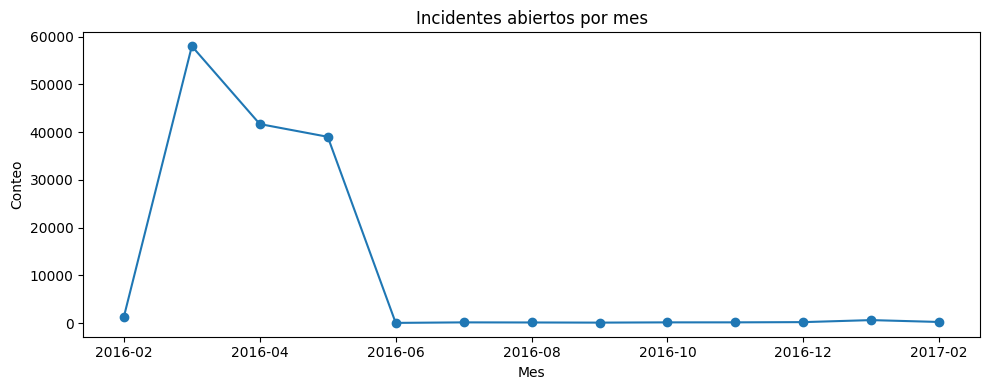

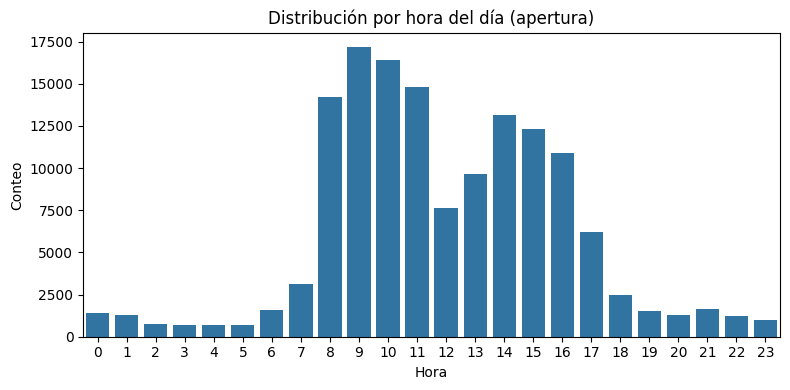

In [25]:
#    A) Conteo de incidentes abiertos por mes
if "opened_month" in df.columns:
    plt.figure(figsize=(10,4))
    df["opened_month"].value_counts().sort_index().plot(kind="line", marker="o")
    plt.title("Incidentes abiertos por mes")
    plt.xlabel("Mes"); plt.ylabel("Conteo")
    plt.tight_layout(); plt.show()

#    B) Distribución de horas del día (apertura)
if "opened_hour" in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x="opened_hour", data=df, order=sorted(df["opened_hour"].dropna().unique()))
    plt.title("Distribución por hora del día (apertura)")
    plt.xlabel("Hora"); plt.ylabel("Conteo")
    plt.tight_layout(); plt.show()

La serie mensual muestra que las aperturas se concentran en marzo–mayo de 2016 y caen casi a cero desde junio, lo que sugiere un filtro aplicado a partir de mitad de año. Por ello, cualquier métrica mensual debería calcularse sobre los meses con datos efectivos. En la distribución por hora, la actividad es baja entre las 0–6 h, aumenta desde las 7–8 h, alcanza su máximo entre 9–11 h, presenta una segunda cresta entre 14–16 h y desciende después de las 17–18 h, patrón consistente con un horario de oficina.

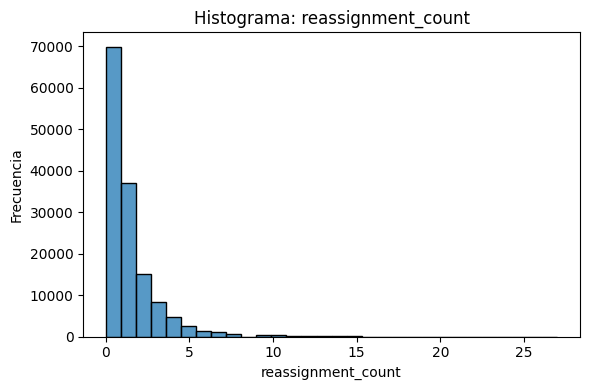

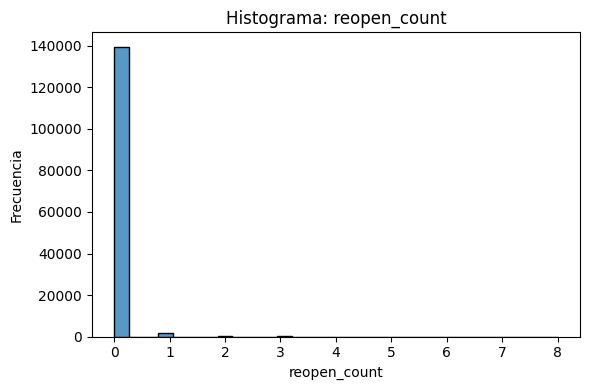

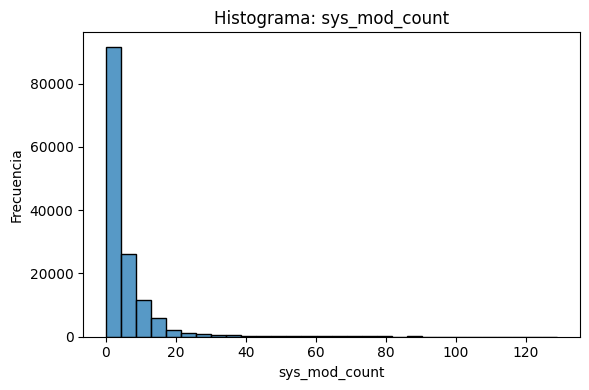

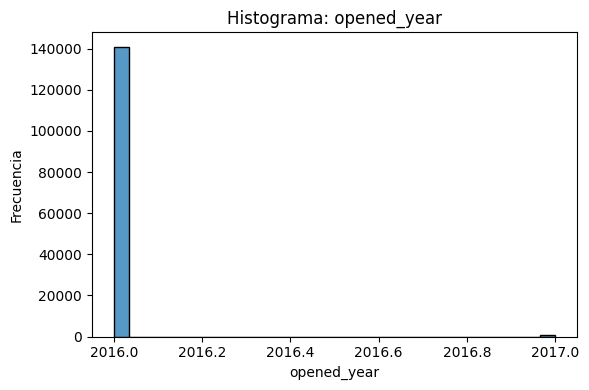

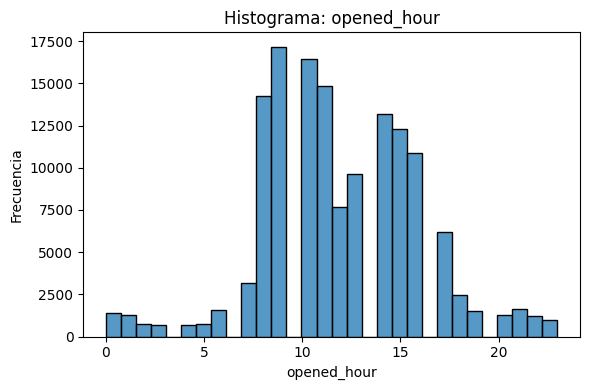

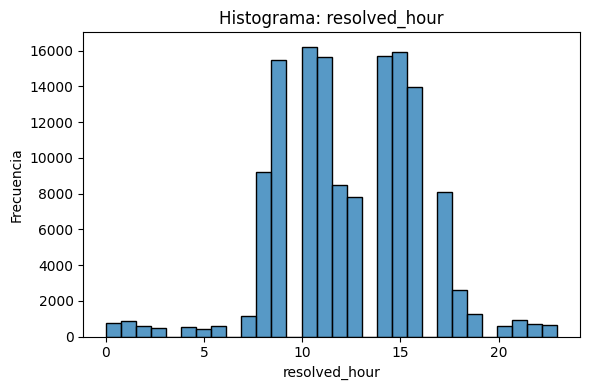

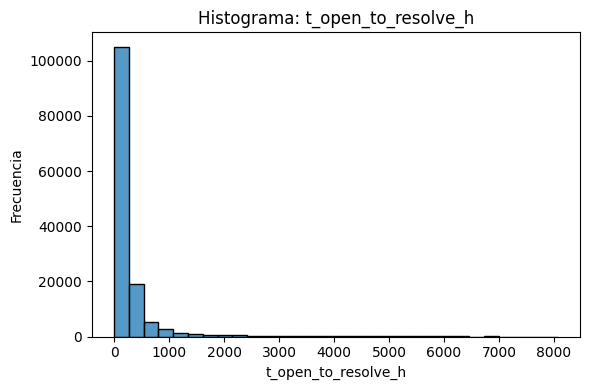

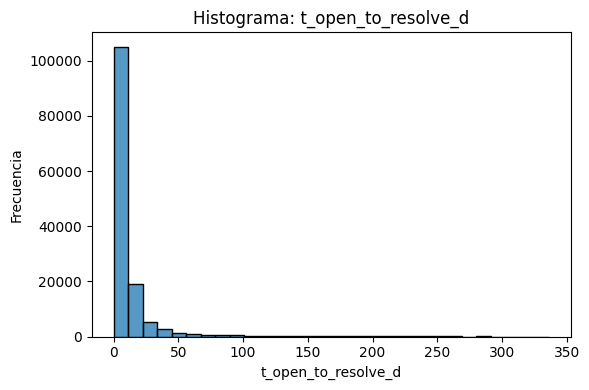

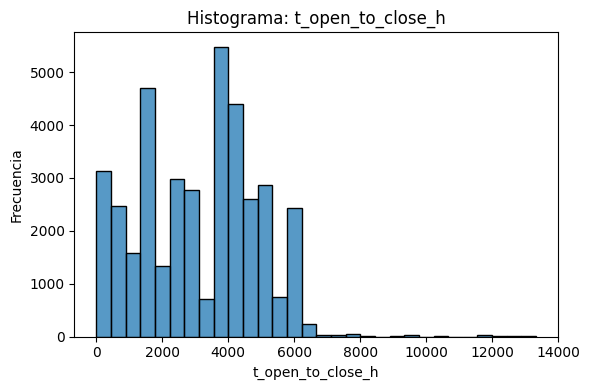

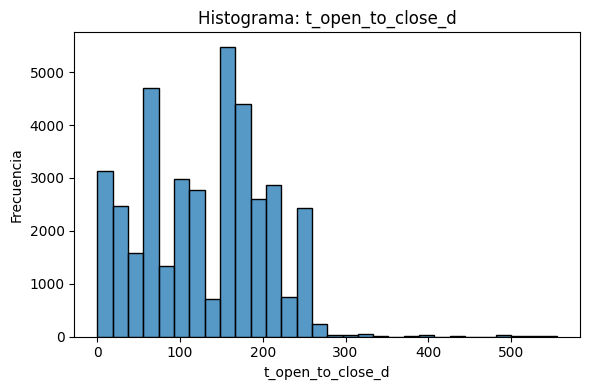

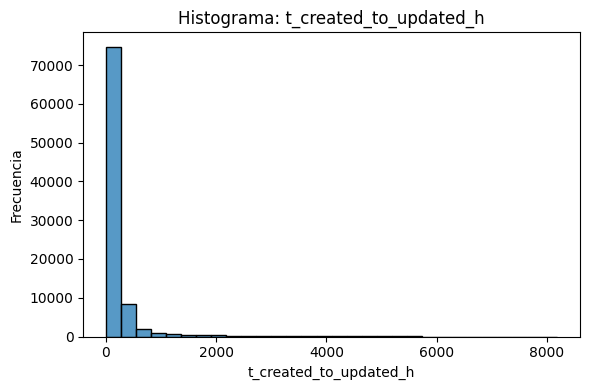

In [20]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), bins=30)
    plt.title(f"Histograma: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia") 
    plt.tight_layout()
    plt.show()

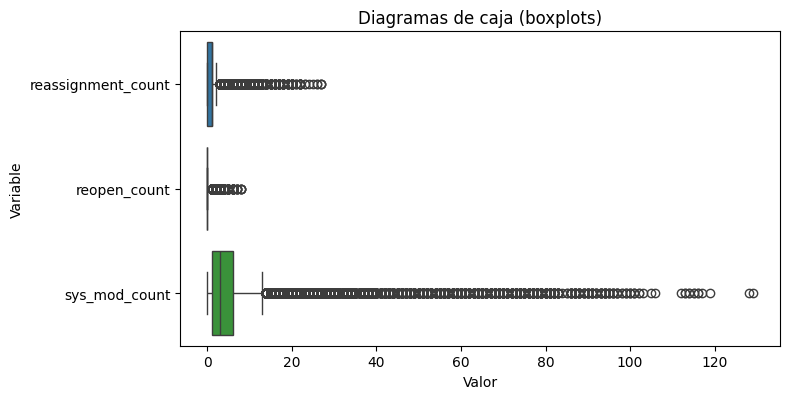

In [ ]:
for i in range(0, 3, 3):
    subset = num_cols[i:i+3]
    plt.figure(figsize=(8, 0.7*len(subset) + 2))
    sns.boxplot(data=df[subset], orient="h")
    plt.title("Diagramas de caja (boxplots)")
    plt.xlabel("Valor")
    plt.ylabel("Variable")
    plt.tight_layout()
    plt.show()

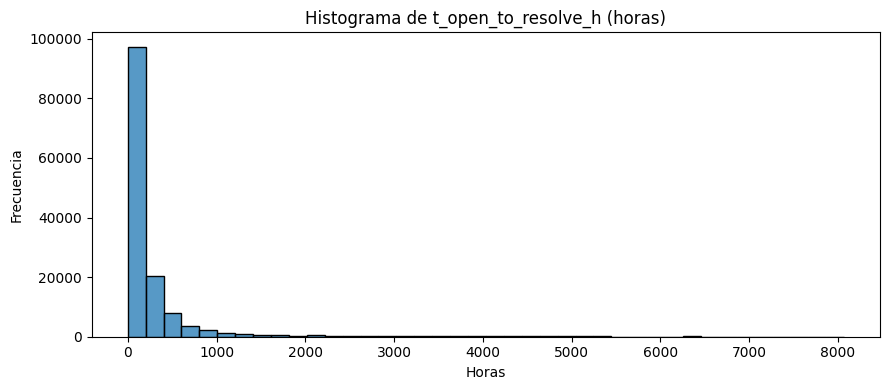

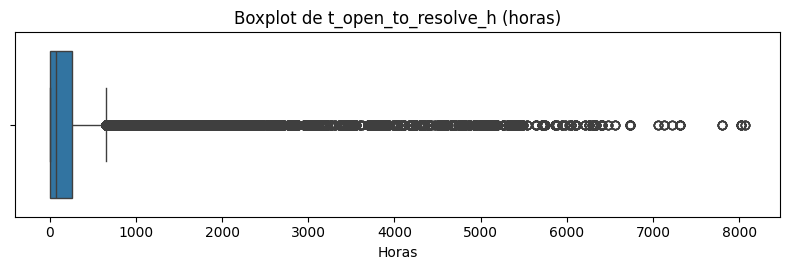

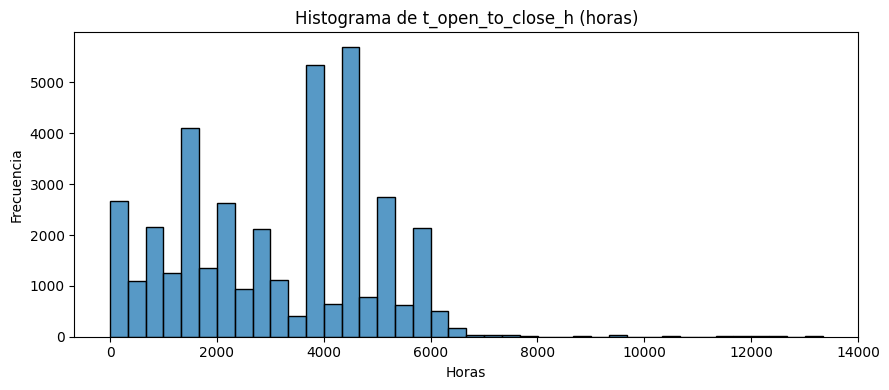

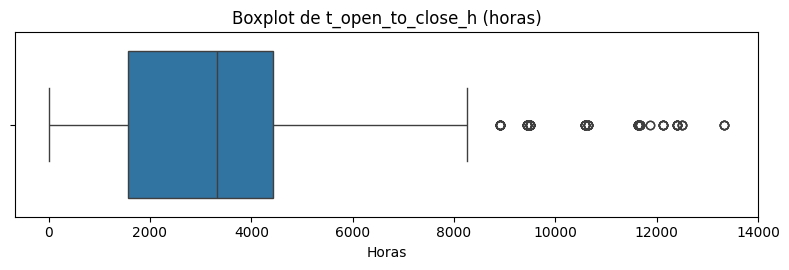

In [32]:
for c in [x for x in ["t_open_to_resolve_h","t_open_to_close_h"] if x in df.columns]:
    plt.figure(figsize=(9,4))
    sns.histplot(df[c].dropna(), bins=40)
    plt.title(f"Histograma de {c} (horas)")
    plt.xlabel("Horas"); plt.ylabel("Frecuencia")
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(8,2.8))
    sns.boxplot(x=df[c])
    plt.title(f"Boxplot de {c} (horas)")
    plt.xlabel("Horas")
    plt.tight_layout(); plt.show()

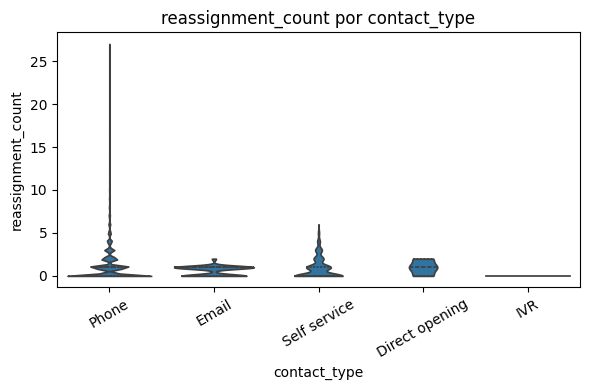

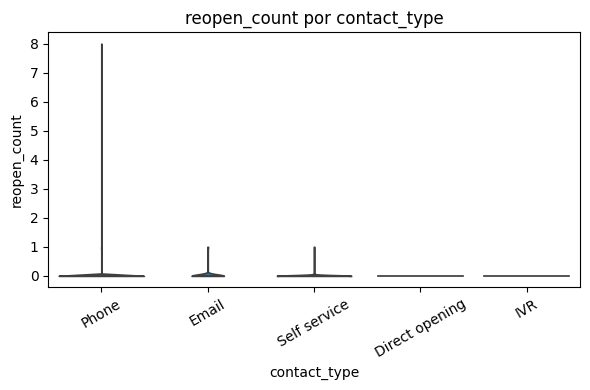

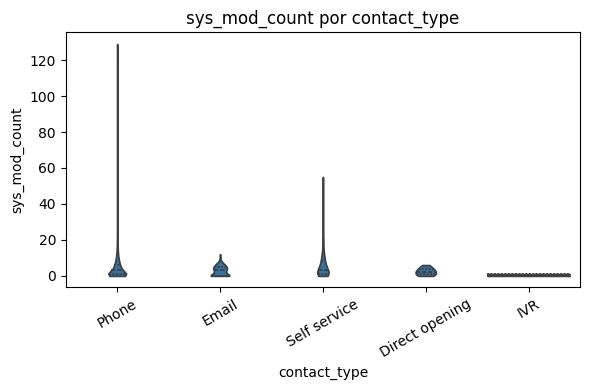

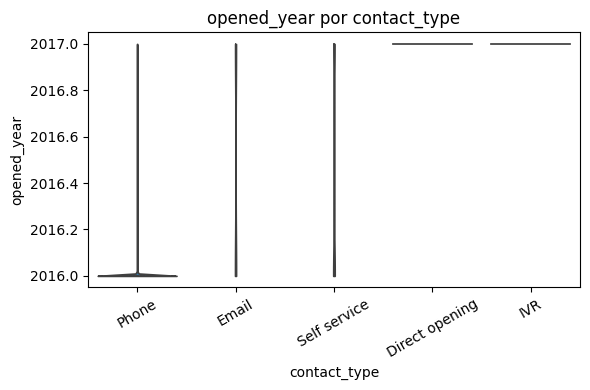

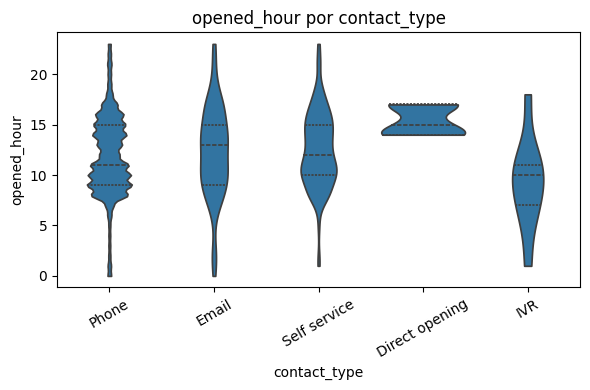

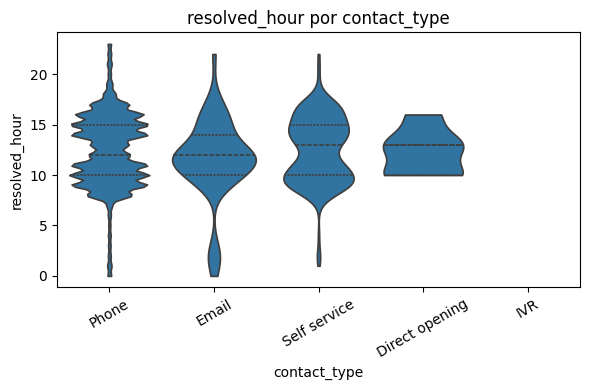

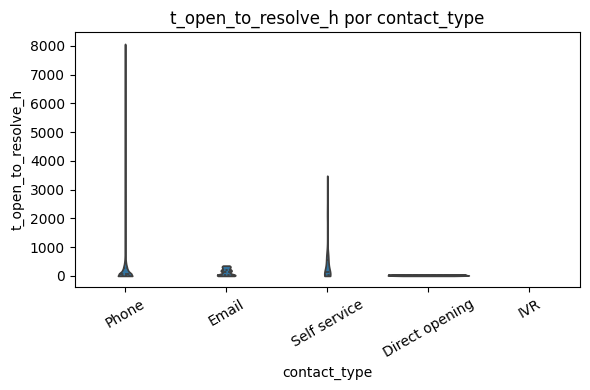

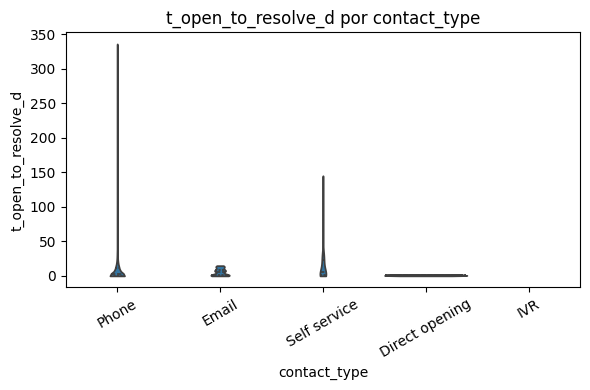

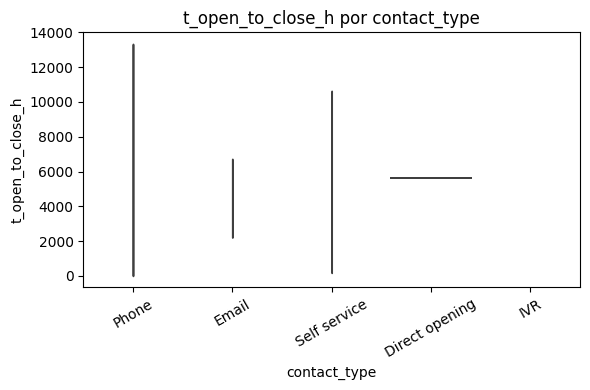

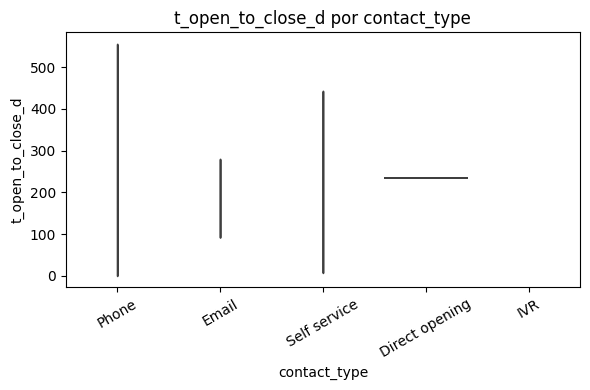

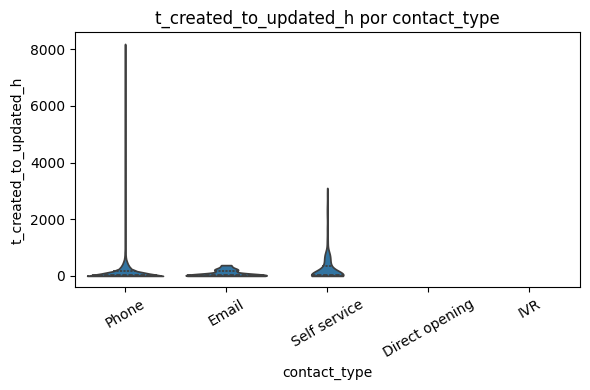

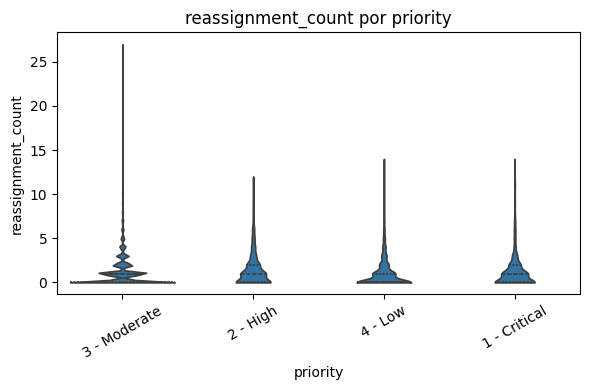

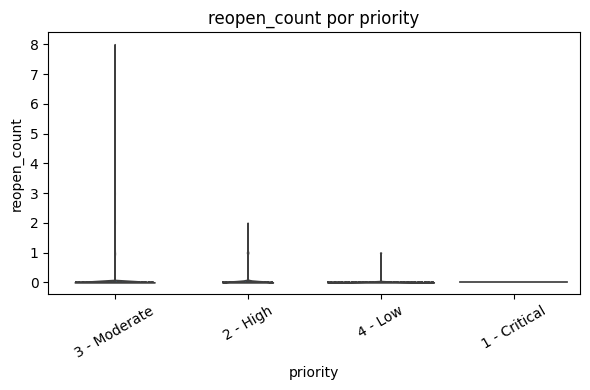

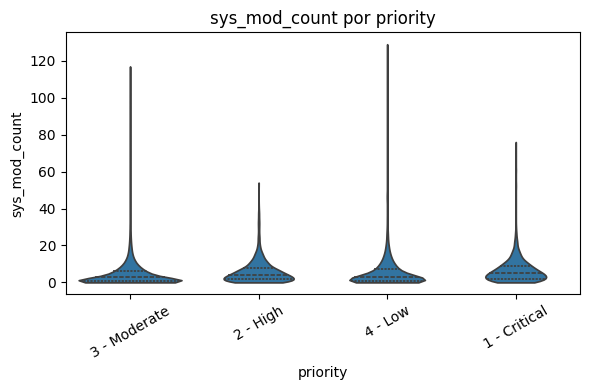

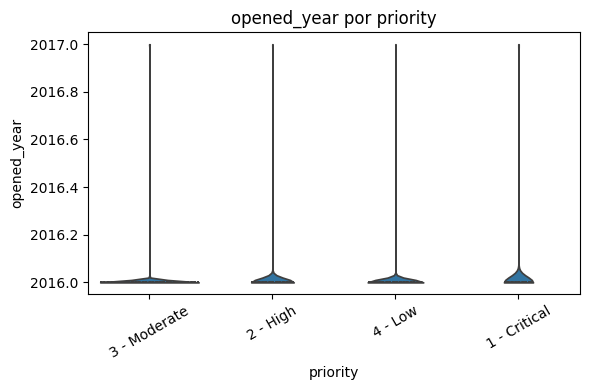

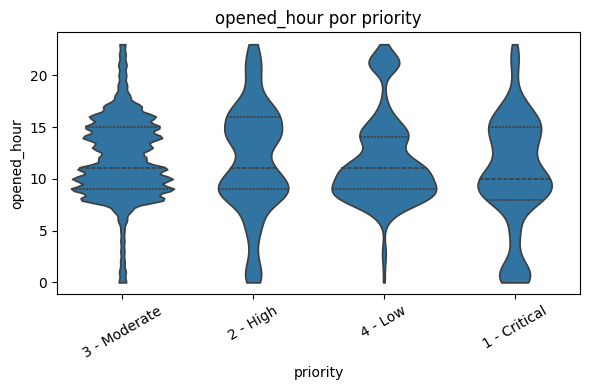

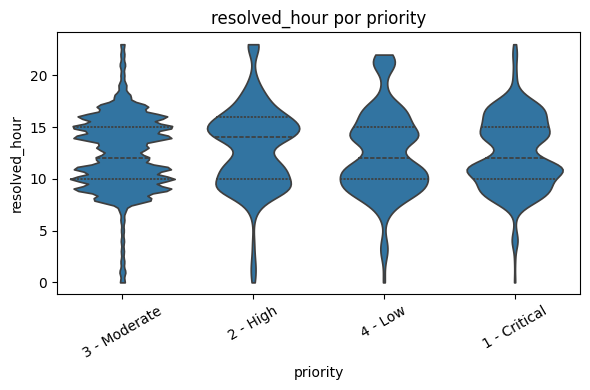

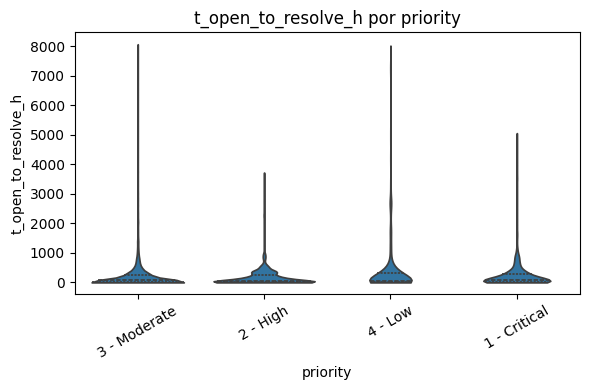

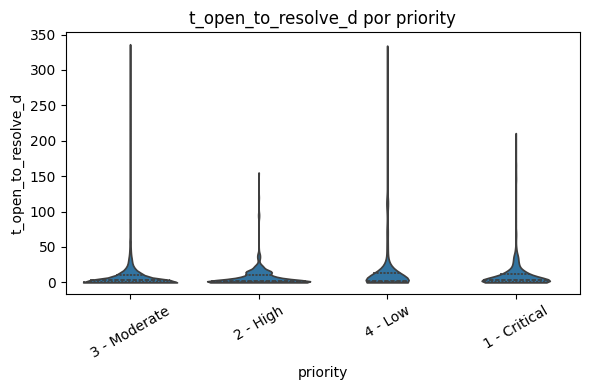

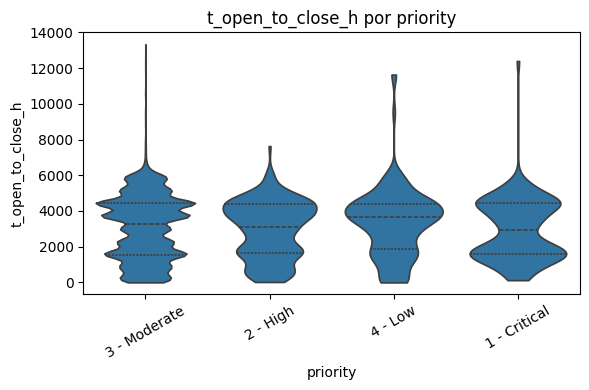

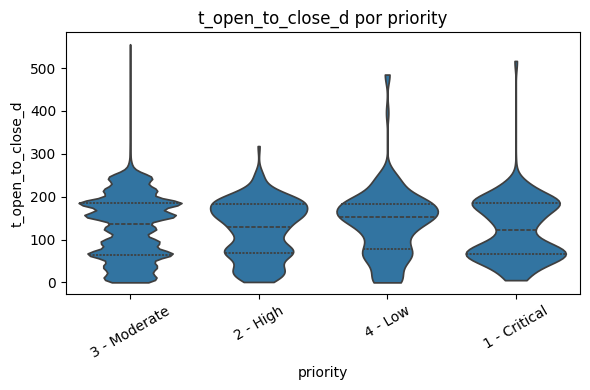

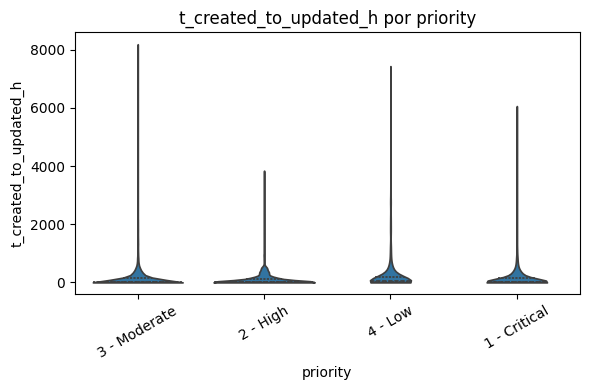

In [27]:
cat_cols_evaluacion = ["contact_type", "priority"]
for i in cat_cols_evaluacion:
    for j in num_cols:
        plt.figure(figsize=(6, 4))
        sns.violinplot(data=df, x=i, y=j, inner="quartile", cut=0)
        plt.title(f"{j} por {i}")
        plt.xlabel(i)
        plt.ylabel(j)
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

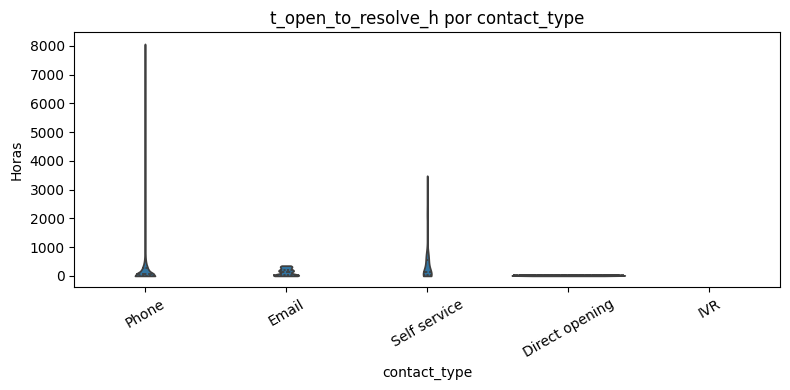

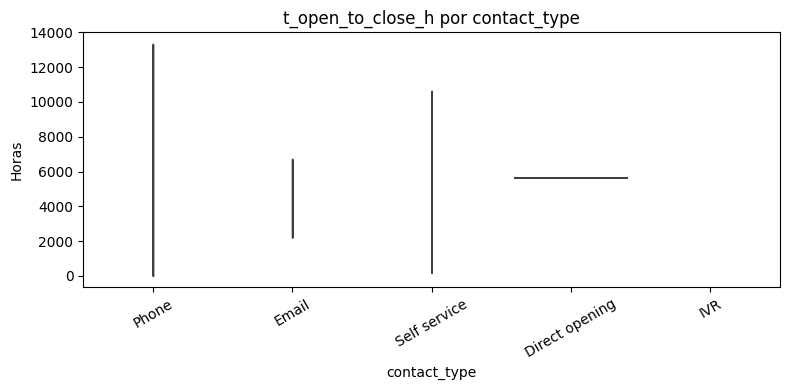

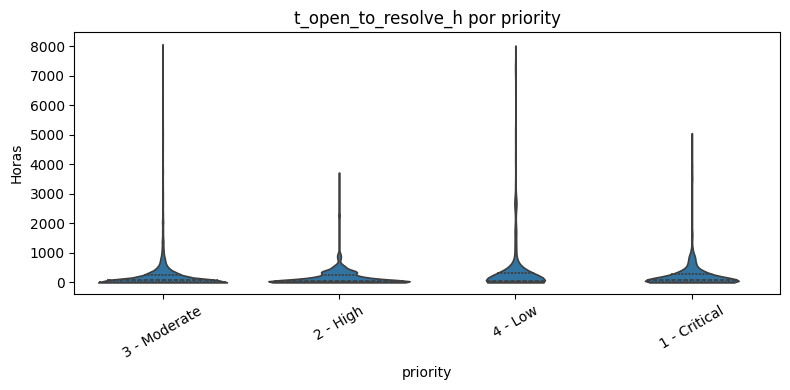

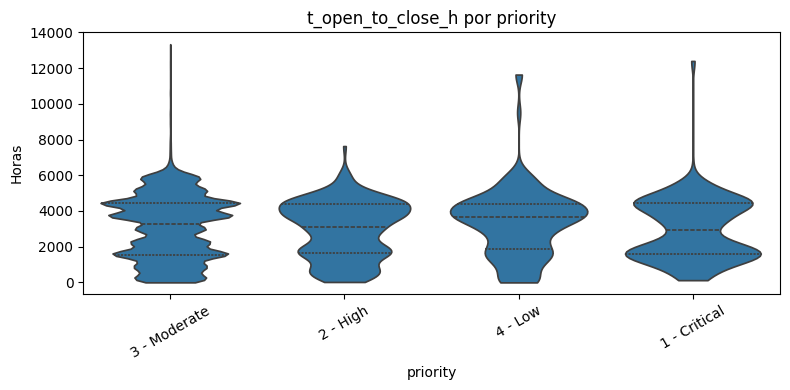

In [28]:
for cat_col in cat_cols_evaluacion:
    for metric in [x for x in ["t_open_to_resolve_h","t_open_to_close_h"] if x in df.columns]:
        plt.figure(figsize=(8,4))
        sns.violinplot(data=df, x=cat_col, y=metric, inner="quartile", cut=0)
        plt.title(f"{metric} por {cat_col}")
        plt.xlabel(cat_col); plt.ylabel("Horas")
        plt.xticks(rotation=30)
        plt.tight_layout(); plt.show()

Numéricas seleccionadas para scatter_matrix: ['t_open_to_close_h', 't_open_to_resolve_h', 't_created_to_updated_h', 't_open_to_close_d', 't_open_to_resolve_d']


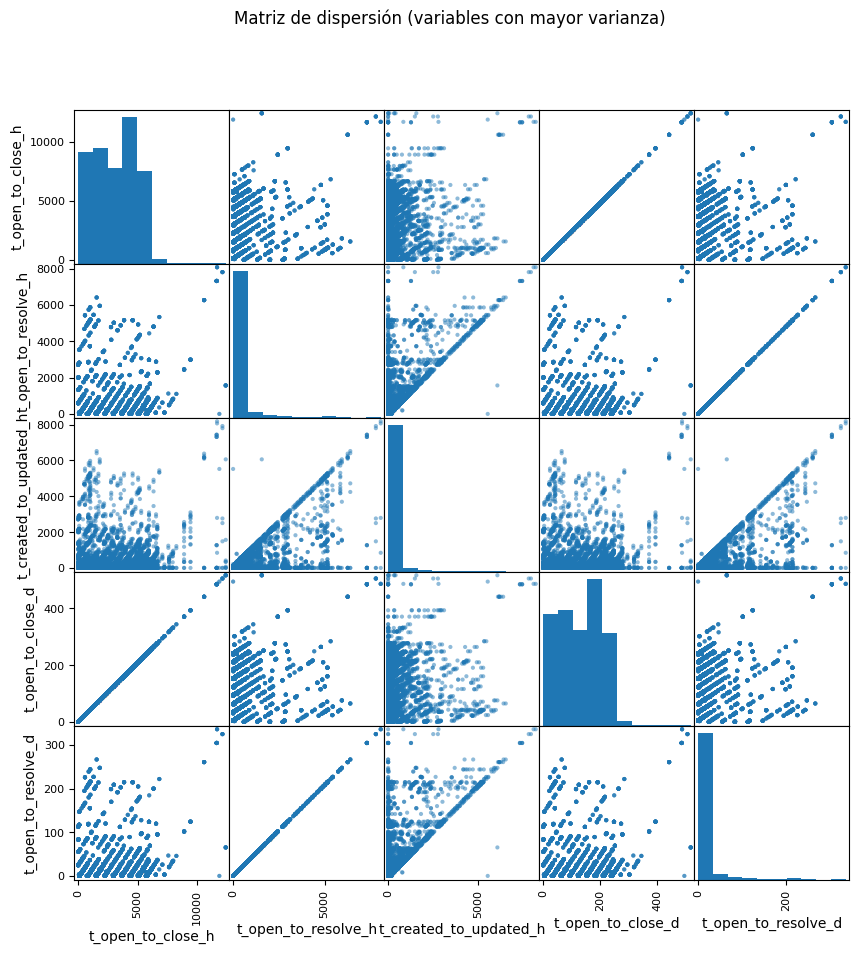

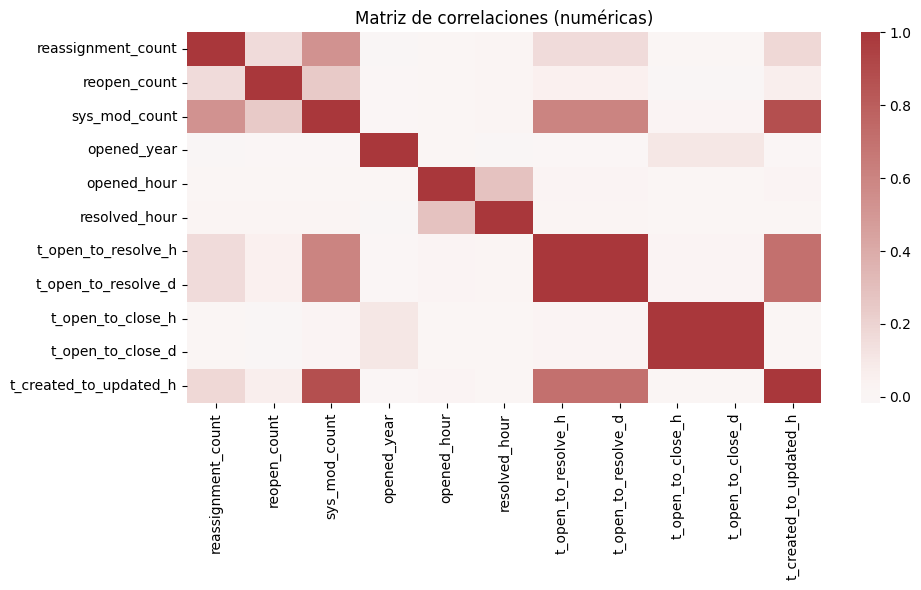

In [31]:
from pandas.plotting import scatter_matrix

#Seleccionamos hasta 5 numéricas con mayor varianza para una matriz de dispersión simple
varianza = df[num_cols].var().sort_values(ascending=False)
top_num = varianza.head(5).index.tolist()
print("Numéricas seleccionadas para scatter_matrix:", top_num)
axs = scatter_matrix(df[top_num].dropna(), figsize=(10, 10), diagonal='hist')
plt.suptitle("Matriz de dispersión (variables con mayor varianza)")
plt.show()

# Mapa de calor de correlación
corr = df[num_cols].corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap="vlag", center=0, annot=False)
plt.title("Matriz de correlaciones (numéricas)")
plt.tight_layout()
plt.show()

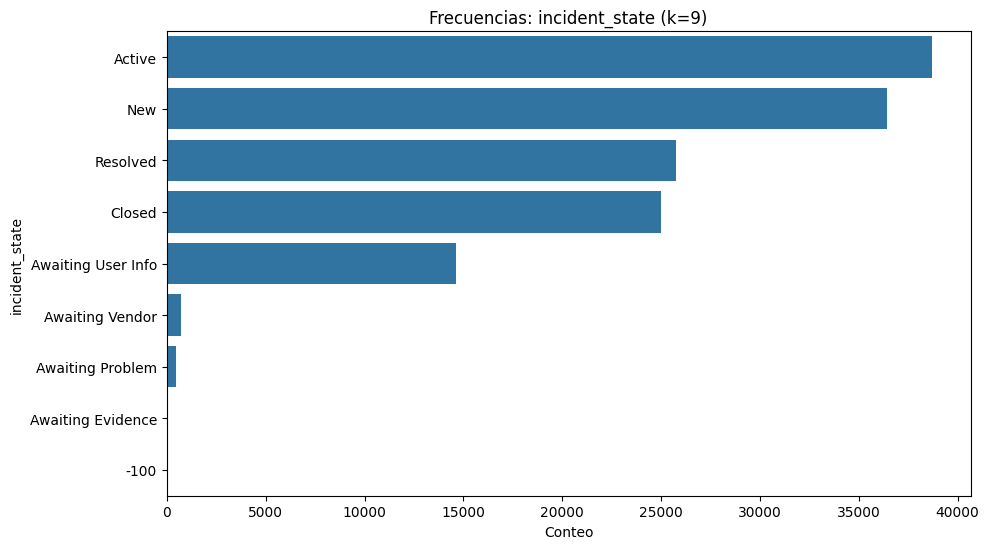

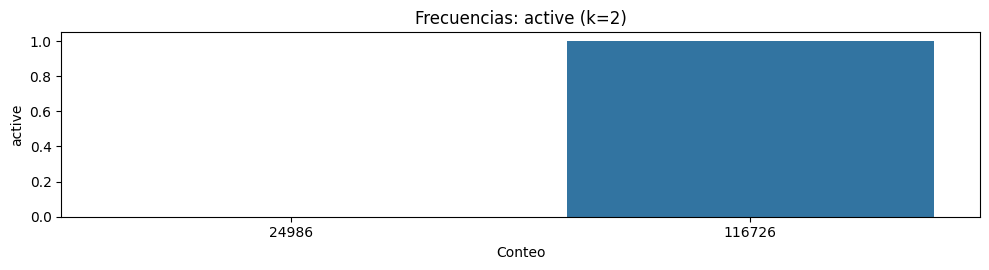

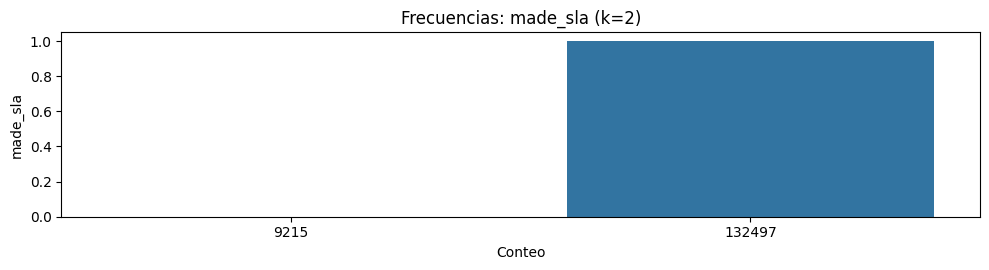

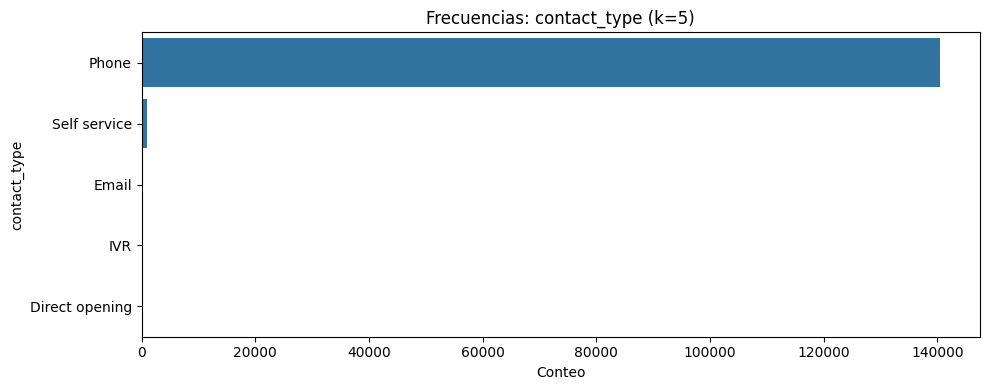

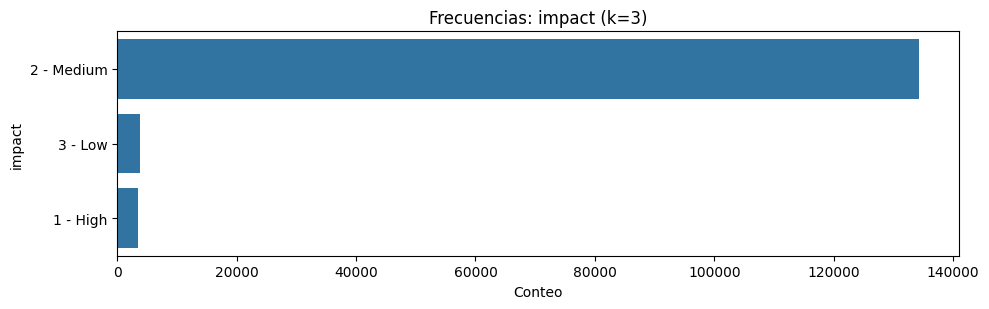

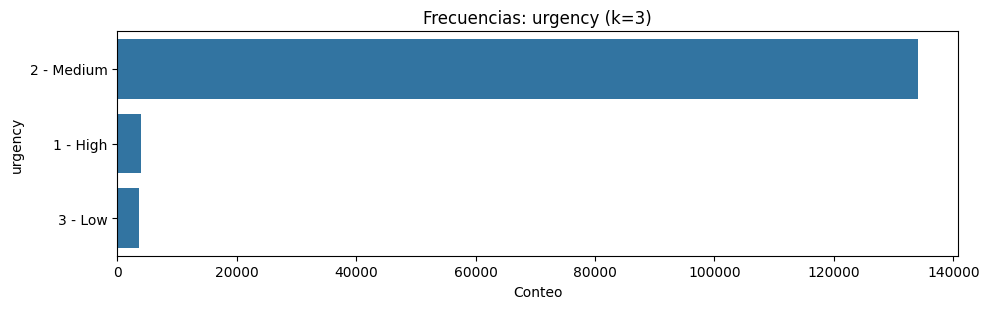

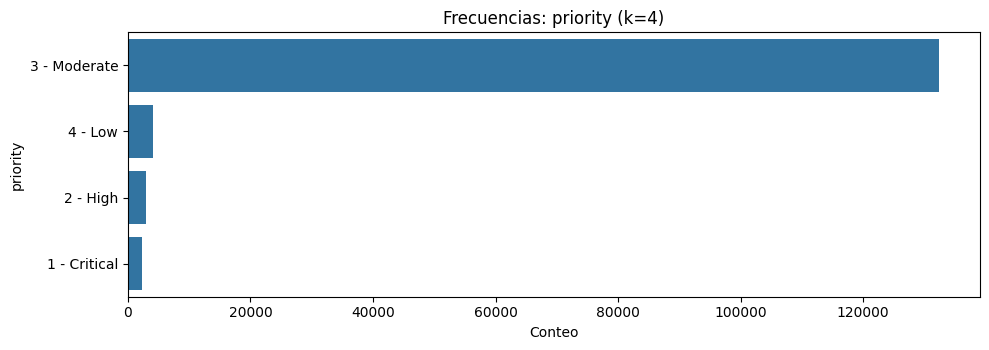

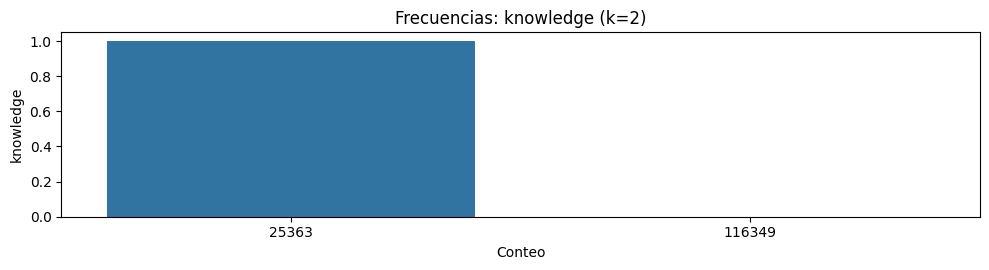

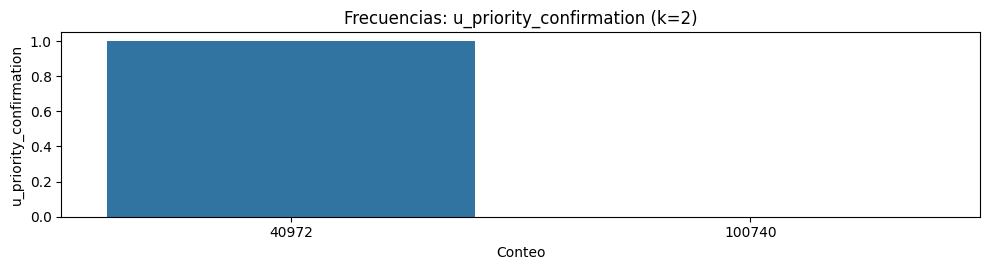

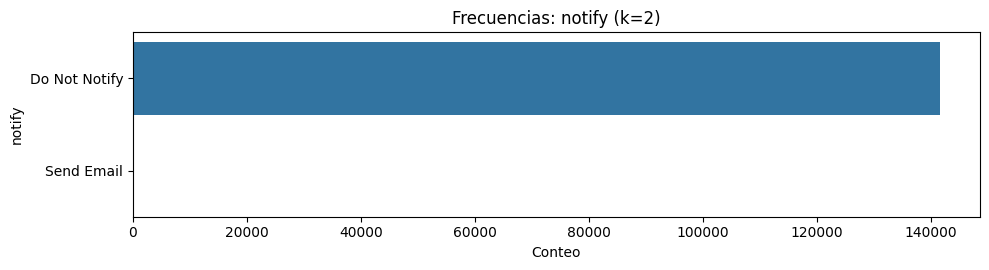

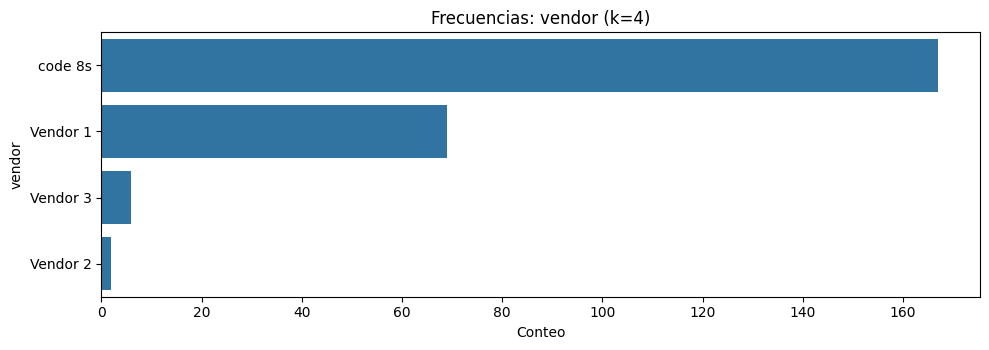

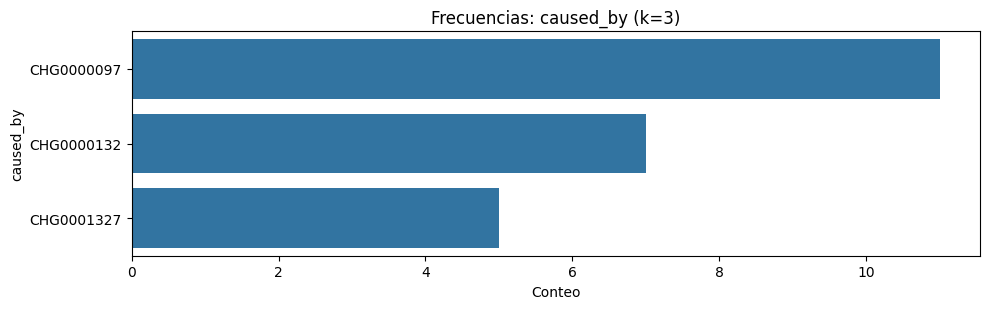

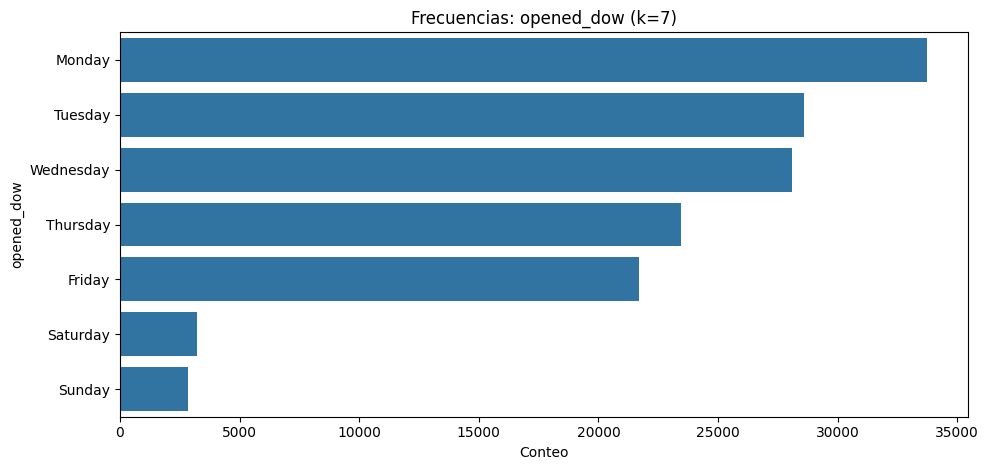

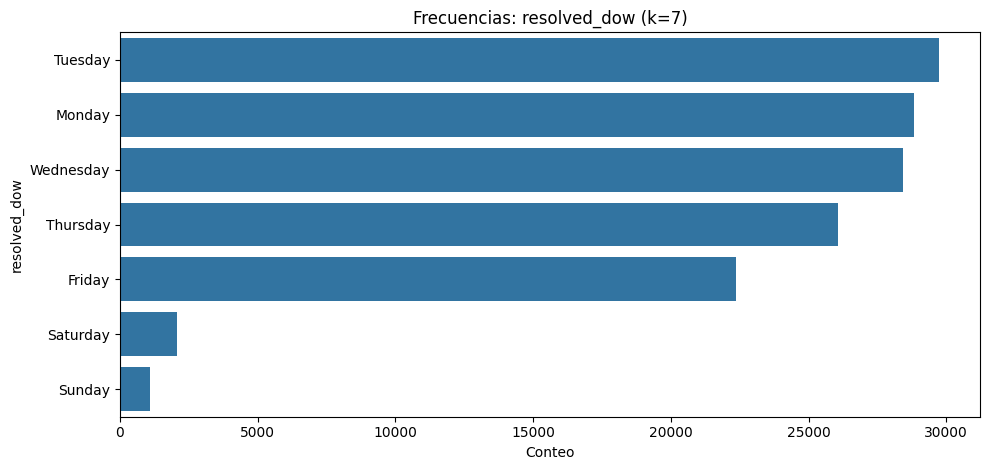

In [32]:
for c in cat_cols:
    k = df[c].nunique()
    if 1 < k <= 12:  # evita columnas con demasiadas categorías o constantes
        plt.figure(figsize=(10, 0.4*k + 2))
        vc = df[c].value_counts(dropna=False)
        sns.barplot(x=vc.values, y=vc.index)
        plt.title(f"Frecuencias: {c} (k={k})")
        plt.xlabel("Conteo")
        plt.ylabel(c)
        plt.tight_layout()
        plt.show()